In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [3]:
df = pd.read_parquet("./arena-explorer-preference-100k.parquet")
english_df = df[df['language'] == 'English'].copy()
english_df['Prompt'] = english_df.apply(lambda x: ' '.join([i['content'] for i in x['conversation_a'] if i['role'] == 'user']), axis=1)
english_df = english_df.drop_duplicates(subset='Prompt')
english_df = english_df[english_df['Prompt'].str.len() < 8000]

In [4]:
english_df.head(6)

,question_id,model_a,model_b,winner,conversation_a,conversation_b,turn,anony,language,tstamp,conv_metadata,is_code,is_refusal,dedup_tag,category_tag,judge_hash,Prompt
1,76ce56f8ba474768bc66128c7993ccb8,mistral-large-2407,athene-70b-0725,model_b,"[{'content': 'php, handle tab in text as html,...","[{'content': 'php, handle tab in text as html,...",2,True,English,1.722726e+09,"{'bold_count_a': {'**': 8, '__': 0}, 'bold_cou...",True,False,"{'high_freq': False, 'sampled': True}","{'criteria_v0.1': {'complexity': True, 'creati...",881bbc801c1e6eb979301eec3b3c401b407a73f70d9a6a...,"php, handle tab in text as html, keeping them ..."
3,e8fe7c9f75ab4e528367cc7de625c475,gemma-2-9b-it,qwen2-72b-instruct,model_b,[{'content': 'Is there any Artificial Superint...,[{'content': 'Is there any Artificial Superint...,2,True,English,1.721643e+09,"{'bold_count_a': {'**': 5, '__': 0}, 'bold_cou...",False,False,"{'high_freq': False, 'sampled': True}","{'criteria_v0.1': {'complexity': False, 'creat...",66f029e5cb9cdb035e859955557fbbeba0b8419ca64ebc...,Is there any Artificial Superintelligence? Wha...
4,772d53e5c51c487e8a293eadcd9d4855,mixtral-8x22b-instruct-v0.1,llama-3.1-70b-instruct,tie (bothbad),[{'content': 'Which number id bigger 9.11 or 9...,[{'content': 'Which number id bigger 9.11 or 9...,1,True,English,1.721899e+09,"{'bold_count_a': {'**': 0, '__': 0}, 'bold_cou...",False,False,"{'high_freq': False, 'sampled': True}","{'criteria_v0.1': {'complexity': True, 'creati...",b4f8e2d271c6c9e6fb08dcabf6ee8a79631e9f2aec6381...,Which number id bigger 9.11 or 9.9 ?
8,6ccd7a51825249d5881ee501e06bb9ab,mixtral-8x22b-instruct-v0.1,gemma-2-2b-it,model_a,[{'content': 'solve this sudoku: . 2 . | 6 . ....,[{'content': 'solve this sudoku: . 2 . | 6 . ....,1,True,English,1.721922e+09,"{'bold_count_a': {'**': 0, '__': 0}, 'bold_cou...",True,False,"{'high_freq': False, 'sampled': True}","{'criteria_v0.1': {'complexity': True, 'creati...",1c91241755db6ca55e95360a3e477c08384ba4e5be161d...,solve this sudoku:\n. 2 . | 6 . . | . . .\n. ....
10,463aa4efacf34f27b6a5c3f1f7417e86,gemini-1.5-pro-api-0514,reka-flash-preview-20240611,model_a,[{'content': 'paraphrase and simplify as best ...,[{'content': 'paraphrase and simplify as best ...,1,True,English,1.719425e+09,"{'bold_count_a': {'**': 0, '__': 0}, 'bold_cou...",False,False,"{'high_freq': False, 'sampled': True}","{'criteria_v0.1': {'complexity': False, 'creat...",83dd1eaa38f069259dc49bb344740ffa472fcb0e03f942...,paraphrase and simplify as best you can: The s...
12,0d1a90cbff6d437f9f6a10c6c1e62437,llama-3.1-8b-instruct,gpt-3.5-turbo-0125,model_b,[{'content': 'Which flag has blue in the cente...,[{'content': 'Which flag has blue in the cente...,1,True,English,1.722077e+09,"{'bold_count_a': {'**': 8, '__': 0}, 'bold_cou...",False,False,"{'high_freq': False, 'sampled': True}","{'criteria_v0.1': {'complexity': False, 'creat...",38b6b86de4ebcbf9ed2201e601d93a19a50071ef5537db...,"Which flag has blue in the center, red at the ..."


In [5]:
english_df.shape

(48586, 17)

In [13]:
# check if the model_a and model_b have the same model names
all_models_a = english_df['model_a'].unique()
all_models_b = english_df['model_b'].unique()
all_models = np.concatenate([all_models_a, all_models_b])
all_models = np.unique(all_models)
print(all_models.shape, all_models_a.shape, all_models_b.shape)

(55,) (53,) (55,)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [Text(0, 0, 'claude-3-5-sonnet-20240620'),
  Text(1, 0, 'gpt-4o-2024-05-13'),
  Text(2, 0, 'gemini-1.5-pro-api-0514'),
  Text(3, 0, 'gemma-2-27b-it'),
  Text(4, 0, 'llama-3-70b-instruct'),
  Text(5, 0, 'gemma-2-9b-it'),
  Text(6, 0, 'gemini-1.5-flash-api-0514'),
  Text(7, 0, 'claude-3-opus-20240229'),
  Text(8, 0, 'gemini-1.5-pro-exp-0801'),
  Text(9, 0, 'llama-3.1-405b-instruct'),
  Text(10, 0, 'chatgpt-4o-latest'),
  Text(11, 0, 'gpt-4o-mini-2024-07-18'),
  Text(12, 0, 'gpt-4-turbo-2024-04-09'),
  Text(13, 0, 'deepseek-v2-api-0628'),
  Text(14, 0, 'claude-3-haiku-20240307'),
  Text(15, 0, 'llama-3.1-70b-instruct'),
  Text(16, 0, 'llama-3-8b-instruct'),
  Text(17, 0, '

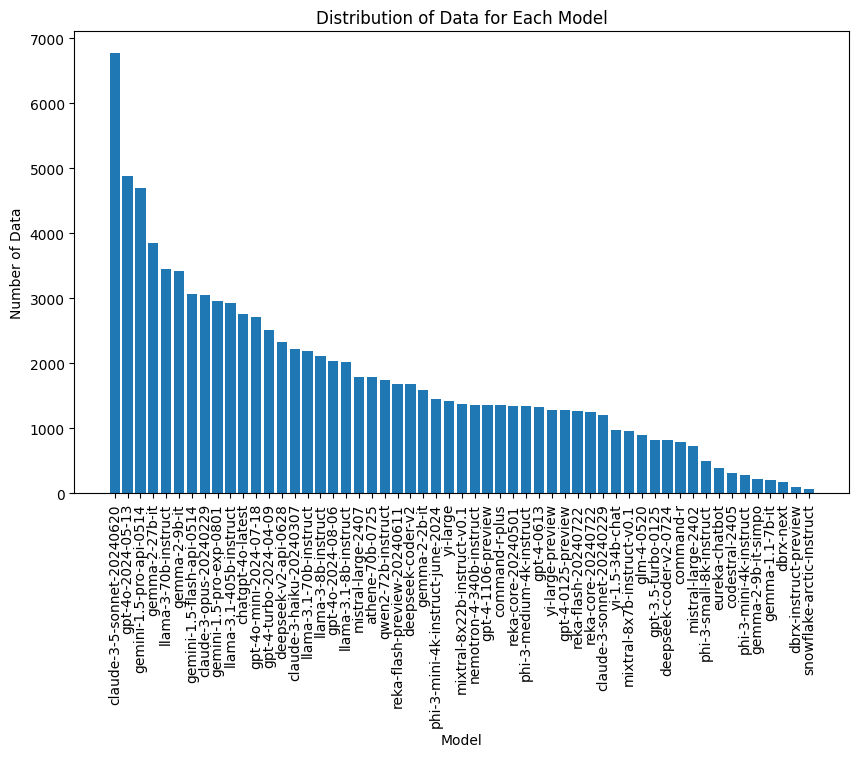

In [23]:
# check how many pieces of data are there for each model
# for model in all_models:
#     print(model, english_df[english_df['model_a'] == model].shape[0], english_df[english_df['model_b'] == model].shape[0])

# sort the models by the number of data and plot the distribution
model_counts = {model: english_df[english_df['model_a'] == model].shape[0] + english_df[english_df['model_b'] == model].shape[0] for model in all_models}
sorted_models = sorted(model_counts.items(), key=lambda x: x[1], reverse=True)
sorted_models = [model for model, count in sorted_models]
plt.figure(figsize=(10, 6))
plt.bar(sorted_models, [model_counts[model] for model in sorted_models])
plt.xlabel('Model')
plt.ylabel('Number of Data')
plt.title('Distribution of Data for Each Model')
# rotate the x-axis labels
plt.xticks(rotation=90)
